In [18]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
np.random.seed(666)
import time

physical_devices = tf.config.list_physical_devices('GPU')

tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
import os, shutil 

original_dataset_dir= 'D:/Documents/Grad-CAM/oasis_brain_no_nn_slices/X/'

base_dir='D:/Documents/Grad-CAM/oasis_alzheimer_both/'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
    
train_dir=os.path.join(base_dir,'train/')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
    
validation_dir=os.path.join(base_dir,'validation/')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
    
test_dir=os.path.join(base_dir,'test/')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

In [4]:
train_alzheimer_dir=os.path.join(train_dir,'Alzheimer')
if not os.path.exists(train_alzheimer_dir):
    os.mkdir(train_alzheimer_dir)

train_healthy_dir = os.path.join(train_dir, 'Healthy')
if not os.path.exists(train_healthy_dir):
    os.mkdir(train_healthy_dir)
    
validation_alzheimer_dir=os.path.join(validation_dir,'Alzheimer')
if not os.path.exists(validation_alzheimer_dir):
    os.mkdir(validation_alzheimer_dir)

validation_healthy_dir = os.path.join(validation_dir, 'Healthy')
if not os.path.exists(validation_healthy_dir):
    os.mkdir(validation_healthy_dir)
    
test_alzheimer_dir=os.path.join(test_dir,'Alzheimer')
if not os.path.exists(test_alzheimer_dir):
    os.mkdir(test_alzheimer_dir)

test_healthy_dir = os.path.join(test_dir, 'Healthy')
if not os.path.exists(test_healthy_dir):
    os.mkdir(test_healthy_dir)

In [5]:
file= open('D:/Documents/Grad-CAM/oasis_cross-sectional_labels.csv','r')

ligne= file.readlines()

file.close()

In [6]:
noms = []
alzheimer = []


for i in range (1,len(ligne)):
    li=str(ligne[i]).rstrip('\n')
    liste=li.split(',')
    
    if liste[7] != "":
        noms.append(liste[0])
        if liste[7] == "0":
            alzheimer.append(0)
        else:
            alzheimer.append(1)

print(len(noms))
print(len(alzheimer))

235
235


In [7]:
# Ajout d'images au dossier d'entrainement
for i in range(0, 175):
    if alzheimer[i] == 1:
        directory = "Alzheimer/"
        fname = noms[i] + '_mpr_nn_anon_111_t88_masked_gfcalzheimer.x77.jpg'
        src= os.path.join(original_dataset_dir, *[directory, fname])
        dst=os.path.join(train_alzheimer_dir, fname)
        if os.path.isfile(src)==True:
            shutil.copyfile(src, dst)
    else:
        directory = "Healthy/"
        fname = noms[i] + '_mpr_nn_anon_111_t88_masked_gfchealthy.x77.jpg'
        src= os.path.join(original_dataset_dir, *[directory, fname])
        dst=os.path.join(train_healthy_dir, fname)
        if os.path.isfile(src)==True:
            shutil.copyfile(src, dst)

In [8]:
# Ajout d'images au dossier de validation
for i in range(175, 200): 
    if alzheimer[i] == 1:
        directory = "Alzheimer/"
        fname = noms[i] + '_mpr_nn_anon_111_t88_masked_gfcalzheimer.x77.jpg'
        src= os.path.join(original_dataset_dir, *[directory, fname])
        dst = os.path.join(validation_alzheimer_dir, fname)
        if os.path.isfile(src)==True:
            shutil.copyfile(src, dst)
    else:
        directory = "Healthy/"
        fname = noms[i] + '_mpr_nn_anon_111_t88_masked_gfchealthy.x77.jpg'
        src= os.path.join(original_dataset_dir, *[directory, fname])
        dst = os.path.join(validation_healthy_dir, fname)
        if os.path.isfile(src)==True:
            shutil.copyfile(src, dst)

In [9]:
# Ajout d'images au dossier de test
for i in range(200, 235):
    if alzheimer[i] == 1:
        directory = "Alzheimer/"
        fname = noms[i] + '_mpr_nn_anon_111_t88_masked_gfcalzheimer.x77.jpg'
        src= os.path.join(original_dataset_dir, *[directory, fname])
        dst = os.path.join(test_alzheimer_dir, fname)
        if os.path.isfile(src)==True:
            shutil.copyfile(src, dst)
    else:
        directory = "Healthy/"
        fname = noms[i] + '_mpr_nn_anon_111_t88_masked_gfchealthy.x77.jpg'
        src= os.path.join(original_dataset_dir, *[directory, fname])
        dst = os.path.join(test_healthy_dir, fname)
        if os.path.isfile(src)==True:
            shutil.copyfile(src, dst)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        #shear_range=0.2,
        zoom_range=0.2,
        brightness_range=[0.5,1.5],
        #horizontal_flip=True,
        #vertical_flip=True,
        #rotation_range=90
        )

In [12]:
image_size = (150, 150)
batch_size = 2

training_set = train_datagen.flow_from_directory(
    "oasis_alzheimer_both/train",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 175 images belonging to 2 classes.


In [13]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_set = validation_datagen.flow_from_directory(
    "oasis_alzheimer_both/validation",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 25 images belonging to 2 classes.


In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    "oasis_alzheimer_both/test",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = False
)

Found 35 images belonging to 2 classes.


## Définition du modèle

In [15]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3),activation='relu', input_shape=(150,150,3)))
model.add(layers.Conv2D(32, (3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                5

In [19]:
epochs = 100

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

start_time = time.time()

history = model.fit(x = training_set, validation_data=validation_set, shuffle=True, epochs=epochs)

print(time.time() - start_time)

Epoch 1/100
88/88 [==============================] - 2s 24ms/step - loss: 0.6862 - accuracy: 0.5714 - val_loss: 0.6632 - val_accuracy: 0.7200
Epoch 2/100
88/88 [==============================] - 2s 27ms/step - loss: 0.6843 - accuracy: 0.5771 - val_loss: 0.6605 - val_accuracy: 0.7200
Epoch 3/100
88/88 [==============================] - 2s 27ms/step - loss: 0.6835 - accuracy: 0.5771 - val_loss: 0.6569 - val_accuracy: 0.7200
Epoch 4/100
88/88 [==============================] - 2s 26ms/step - loss: 0.6834 - accuracy: 0.5771 - val_loss: 0.6547 - val_accuracy: 0.7200
Epoch 5/100
88/88 [==============================] - 2s 20ms/step - loss: 0.6830 - accuracy: 0.5771 - val_loss: 0.6531 - val_accuracy: 0.7200
Epoch 6/100
88/88 [==============================] - 2s 18ms/step - loss: 0.6825 - accuracy: 0.5771 - val_loss: 0.6504 - val_accuracy: 0.7200
Epoch 7/100
88/88 [==============================] - 2s 17ms/step - loss: 0.6823 - accuracy: 0.5771 - val_loss: 0.6491 - val_accuracy: 0.7200
Epoch 

88/88 [==============================] - 2s 27ms/step - loss: 0.6816 - accuracy: 0.5771 - val_loss: 0.6376 - val_accuracy: 0.7200
Epoch 59/100
88/88 [==============================] - 2s 26ms/step - loss: 0.6814 - accuracy: 0.5771 - val_loss: 0.6373 - val_accuracy: 0.7200
Epoch 60/100
88/88 [==============================] - 2s 26ms/step - loss: 0.6815 - accuracy: 0.5771 - val_loss: 0.6359 - val_accuracy: 0.7200
Epoch 61/100
88/88 [==============================] - 2s 24ms/step - loss: 0.6816 - accuracy: 0.5771 - val_loss: 0.6370 - val_accuracy: 0.7200
Epoch 62/100
88/88 [==============================] - 1s 16ms/step - loss: 0.6813 - accuracy: 0.5771 - val_loss: 0.6362 - val_accuracy: 0.7200
Epoch 63/100
88/88 [==============================] - 2s 24ms/step - loss: 0.6814 - accuracy: 0.5771 - val_loss: 0.6358 - val_accuracy: 0.7200
Epoch 64/100
88/88 [==============================] - 2s 24ms/step - loss: 0.6814 - accuracy: 0.5771 - val_loss: 0.6361 - val_accuracy: 0.7200
Epoch 65/100

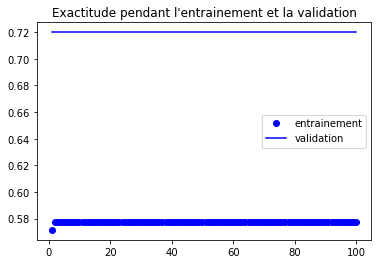

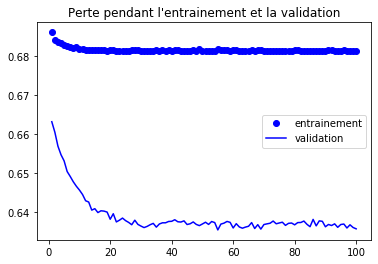

In [20]:
import matplotlib.pyplot as plt

acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss= history.history['loss']
val_loss= history.history['val_loss']

epochs= range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='entrainement')
plt.plot(epochs, val_acc,'b', label='validation')
plt.title('Exactitude pendant l\'entrainement et la validation')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='entrainement')
plt.plot(epochs, val_loss, 'b', label='validation')
plt.title('Perte pendant l\'entrainement et la validation')
plt.legend()
plt.show()

In [21]:
test_loss, test_acc= model.evaluate(test_set)

18/18 [==============================] - 0s 9ms/step - loss: 0.7194 - accuracy: 0.4571


In [22]:
print(test_loss, test_acc)

0.7194477915763855 0.4571428596973419


In [23]:
from keras.preprocessing import image

test_image = image.load_img('./oasis_alzheimer_both/test/Alzheimer/OAS1_0430_MR1_mpr_nn_anon_111_t88_masked_gfcalzheimer.x77.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)/255.
test_image = np.expand_dims(test_image, axis=0)

prediction = model.predict_on_batch(test_image)
print(prediction)

[[0.42099428 0.5790057 ]]


Using TensorFlow backend.


In [24]:
from keras.preprocessing import image

test_image = image.load_img('./oasis_alzheimer_both/test/Alzheimer/OAS1_0432_MR1_mpr_nn_anon_111_t88_masked_gfcalzheimer.x77.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)/255.
test_image = np.expand_dims(test_image, axis=0)

prediction = model.predict_on_batch(test_image)
print(prediction)

[[0.42099428 0.5790057 ]]


In [25]:
from keras.preprocessing import image

test_image = image.load_img('./oasis_alzheimer_both/test/Healthy/OAS1_0426_MR1_mpr_nn_anon_111_t88_masked_gfchealthy.x77.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)/255.
test_image = np.expand_dims(test_image, axis=0)

prediction = model.predict_on_batch(test_image)
print(prediction)

[[0.42099428 0.5790057 ]]


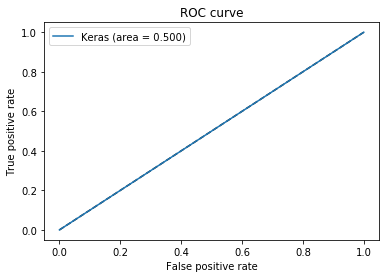

In [26]:
y_true_labels = test_set.classes
true_labels = []

for label in y_true_labels:
    true_labels.append(np.array([np.float32(label)]))

preds = model.predict(test_set)

predictions = []

for x in preds.tolist():
    predictions.append(x[1])

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(true_labels, predictions)
auc = auc(fpr, tpr)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Sauvegarde du modèle

In [ ]:
model.save('D:/Documents/Grad-CAM/models/OASIS/3_couches_adam')

### Pour juste loader le modèle

In [173]:
import tensorflow as tf
from tensorflow import keras

loaded_model = keras.models.load_model('D:/Documents/Grad-CAM/models/OASIS/3_couches_adam_71_43_binary')

In [174]:
test_loss, test_acc= loaded_model.evaluate(test_set)

5/5 [==============================] - 0s 20ms/step - loss: 0.7315 - accuracy: 0.5000


# Grad-CAM

#### https://gist.github.com/RaphaelMeudec/e9a805fa82880876f8d89766f0690b54

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras

physical_devices = tf.config.list_physical_devices('GPU')

tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
IMAGE_PATH = './oasis_alzheimer/test/Alzheimer/OAS1_0388_MR1_mpr_nn_anon_111_t88_masked_gfcalzheimer.x77.jpg'

LAYER_NAME = 'conv2d_8'
HOMME_CLASS_INDEX = 1
FEMME_CLASS_INDEX = 0

img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(150, 150))
img = tf.keras.preprocessing.image.img_to_array(img)/255.

#model = keras.models.load_model('D:/Documents/Grad-CAM/models/4_couches_adam_98_07_categorical')

grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(LAYER_NAME).output, model.output])

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(np.array([img]))
    loss = predictions[:, HOMME_CLASS_INDEX]

output = conv_outputs[0]
grads = tape.gradient(loss, conv_outputs)[0]

gate_f = tf.cast(output > 0, 'float32')
gate_r = tf.cast(grads > 0, 'float32')
guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

weights = tf.reduce_mean(guided_grads, axis=(0, 1))

cam = np.ones(output.shape[0: 2], dtype = np.float32)

for i, w in enumerate(weights):
    cam += w * output[:, :, i]

cam = cv2.resize(cam.numpy(), (150, 150))
cam = np.maximum(cam, 0)
heatmap = (cam - cam.min()) / (cam.max() - cam.min())

cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

output_image = cv2.addWeighted(cv2.cvtColor(img.astype('uint8'), cv2.COLOR_RGB2BGR), 0.5, cam, 1, 0)

cv2.imwrite('cam.png', output_image)

In [ ]:
predictions.numpy()

In [ ]:
model.summary()